<a href="https://colab.research.google.com/github/KAyush16/EDA/blob/main/book_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
books = pd.read_csv('/content/Books_Data_Clean.csv')
#books.head()
df = books.copy()
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


# OverView Of the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [4]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [5]:
df.isna().sum()

,0
index,0
Publishing Year,1
Book Name,23
Author,0
language_code,53
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


# Data Accessing
Quality Issues:

1. **index** : NONE

2. **Publishing Year** :
- Some negative values `accuracy`
- empty values so put there 0 insted of empty `completness`
- very less values Less than 1900 so we will remove rest less
3. **Book Name**:
- Missing Values Present(like 826,494...)
- Some Random Charcters are there as a Name (like 823,833,710,654,553,512...)
4. **Author**:
- in between names some characters are there and some individual Character names are there `consistency + accuracy`
5. **Language**:
- Missing Values are there



In [6]:
# publising year --> all missing values problem are gone just by puting year>1900
df = df[df['Publishing Year']>1900]

In [7]:
df['Publishing Year'].value_counts()

,count
Publishing Year,
2012.0,68
2011.0,55
2009.0,46
2010.0,44
2006.0,41
...,...
1912.0,1
1963.0,1
1928.0,1


Checking Missing Values

In [8]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


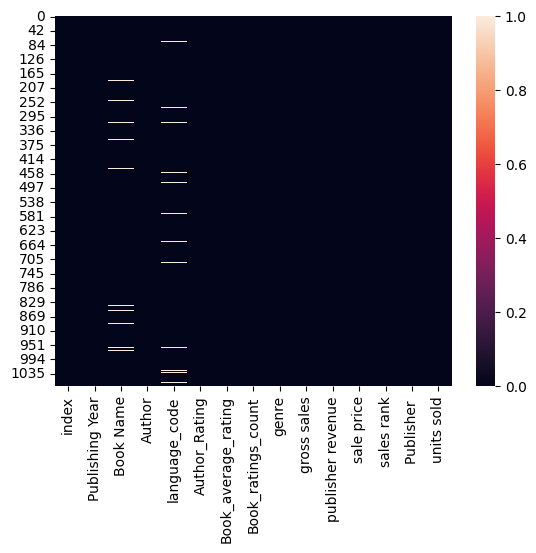

In [9]:
# showing where are the null values present
sns.heatmap(df.isna())
plt.show()

Handling Missing Data and Cleaning it

In [10]:
df.info()
# convert the Publishing Year --> only year DateTIme formate
# .dt.year extract the year column only
df['Publishing Year'] = pd.to_datetime(df['Publishing Year'], format='%Y',errors='coerce').dt.year

<class 'pandas.core.frame.DataFrame'>
Index: 1009 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1009 non-null   int64  
 1   Publishing Year      1009 non-null   float64
 2   Book Name            988 non-null    object 
 3   Author               1009 non-null   object 
 4   language_code        960 non-null    object 
 5   Author_Rating        1009 non-null   object 
 6   Book_average_rating  1009 non-null   float64
 7   Book_ratings_count   1009 non-null   int64  
 8   genre                1009 non-null   object 
 9   gross sales          1009 non-null   float64
 10  publisher revenue    1009 non-null   float64
 11  sale price           1009 non-null   float64
 12  sales rank           1009 non-null   int64  
 13  Publisher            1009 non-null   object 
 14  units sold           1009 non-null   int64  
dtypes: float64(5), int64(4), object(6)
memory u

In [11]:
# book_name --> Unknown
df['Book Name'] = df['Book Name'].fillna('Unknown')

In [12]:
# language_code --> Unknown
df['language_code']=df['language_code'].fillna('Unknown')

# EDA Analysis

### **Uni-Variate Analysis:**

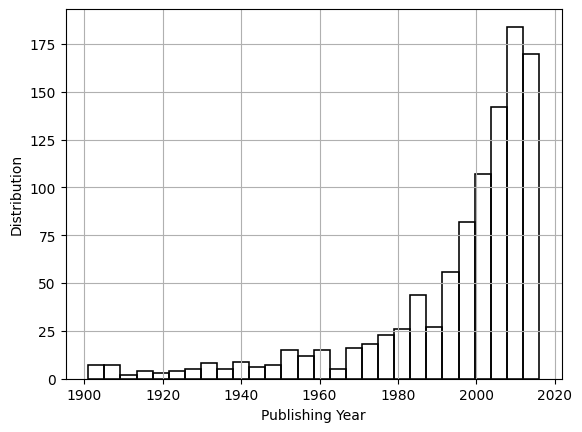

In [13]:
# Publishing Year Vs Distribution Year
sns.histplot(df,x='Publishing Year',fill=False,color='black')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

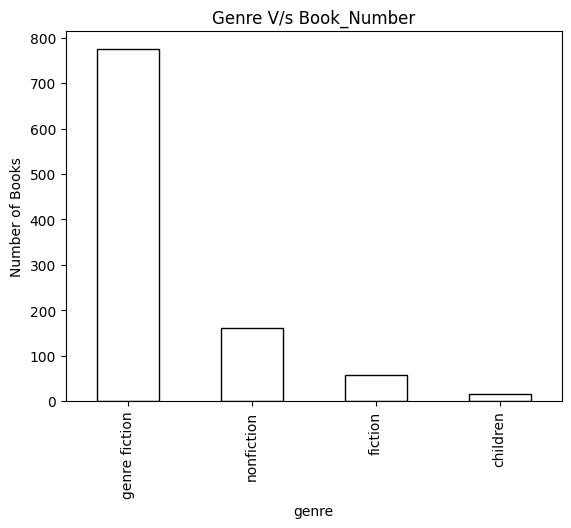

In [14]:
# Total Book Number in each Genre
df['genre'].value_counts().plot(kind='bar',fill=False)
plt.xlabel('genre')
plt.ylabel('Number of Books')
plt.title('Genre V/s Book_Number')
plt.show()

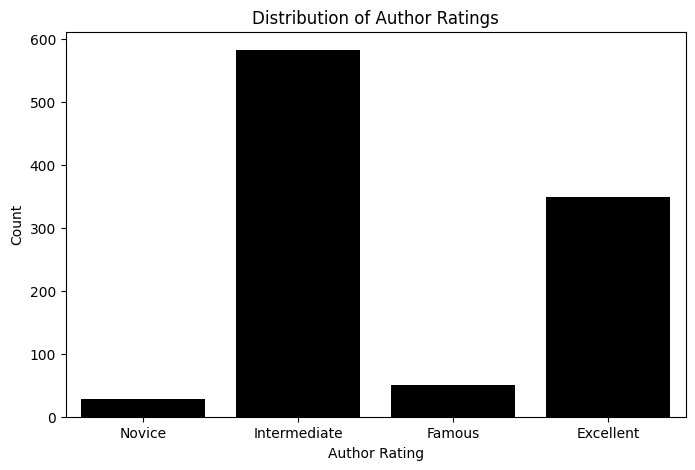

In [15]:
# Visualize the distribution of Author_Rating
plt.figure(figsize=(8, 5))
sns.countplot(df, x='Author_Rating', color='black')
plt.xlabel('Author Rating')
plt.ylabel('Count')
plt.title('Distribution of Author Ratings')
plt.show()

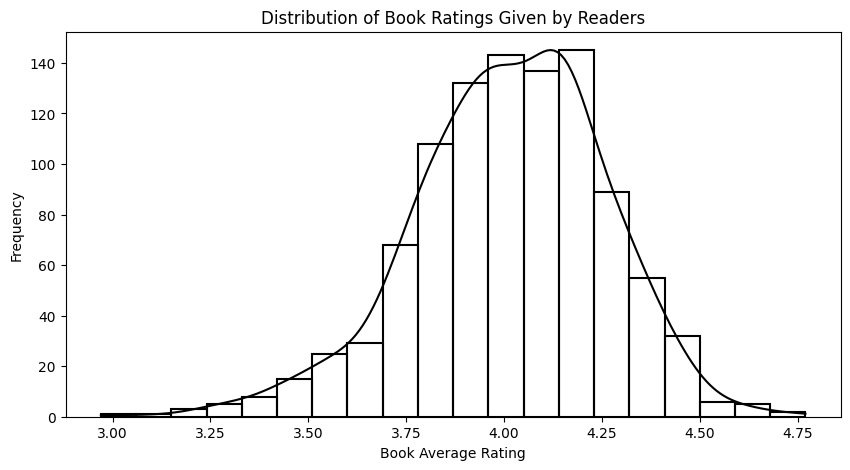

In [16]:
#overall distribution of book ratings given by readers?
plt.figure(figsize=(10, 5))
sns.histplot(df['Book_average_rating'], bins=20, kde=True,fill=False,color='black')
plt.xlabel('Book Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Book Ratings Given by Readers')
plt.show()

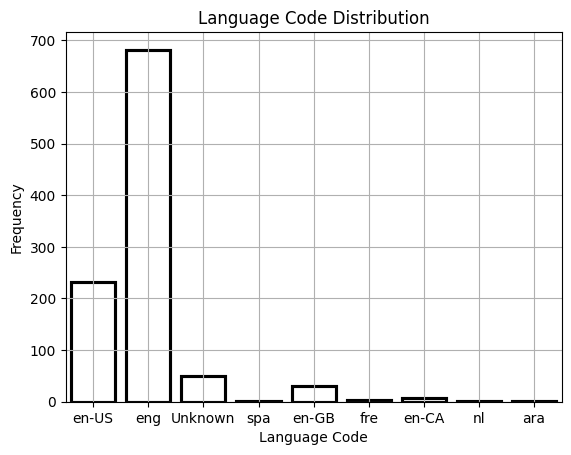

In [17]:
# language code Distribution
# most language_code used:
sns.countplot(df, x='language_code',fill= False,color='black')
plt.xlabel('Language Code')
plt.ylabel('Frequency')
plt.title('Language Code Distribution')
plt.grid(True)
plt.show()

### **Bi-Variate Analysis**

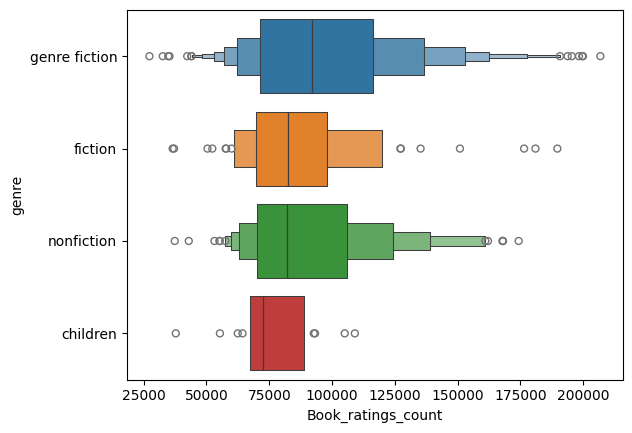

In [18]:
# Visualize the distribution of average ratings across genres using a boxplot
sns.boxenplot(df, x='Book_ratings_count',y='genre', hue='genre')
plt.show()

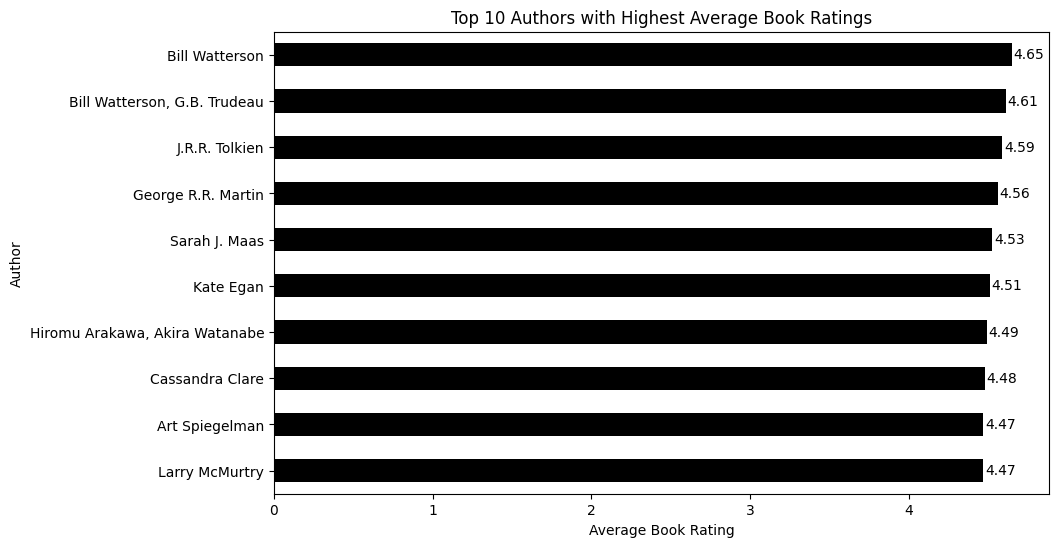

In [19]:
# author and author avg book rating
top_authors = df.groupby('Author')['Book_average_rating'].mean().nlargest(10)
# Plotting
plt.figure(figsize=(10, 6))
ax = top_authors.sort_values().plot(kind='barh', color='black')
plt.xlabel('Average Book Rating')
plt.ylabel('Author')
plt.title('Top 10 Authors with Highest Average Book Ratings')

# Add value labels to the bars
for i, v in enumerate(top_authors.sort_values().values):
    ax.text(v + 0.01, i, f'{v:.2f}', va='center')

plt.show()

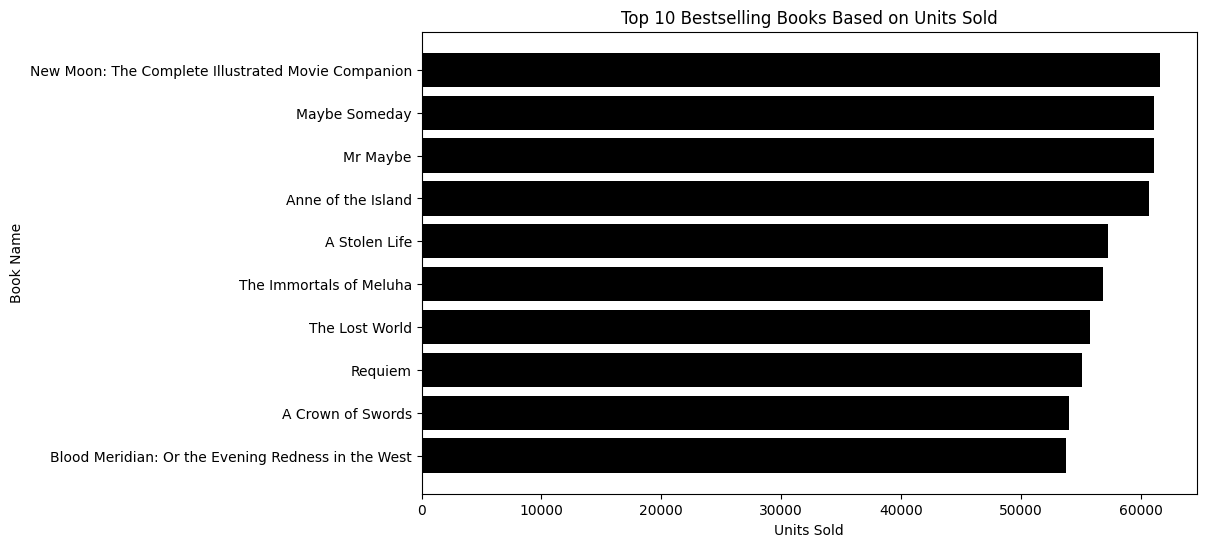

In [31]:
# top selling books based on units sold
top_books_by_units_sold = df.nlargest(10, 'units sold')[['Book Name', 'units sold']]
plt.figure(figsize=(10, 6))
plt.barh(top_books_by_units_sold['Book Name'], top_books_by_units_sold['units sold'], color='black')
plt.xlabel('Units Sold')
plt.ylabel('Book Name')
plt.title('Top 10 Bestselling Books Based on Units Sold')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest units sold at the top
plt.show()

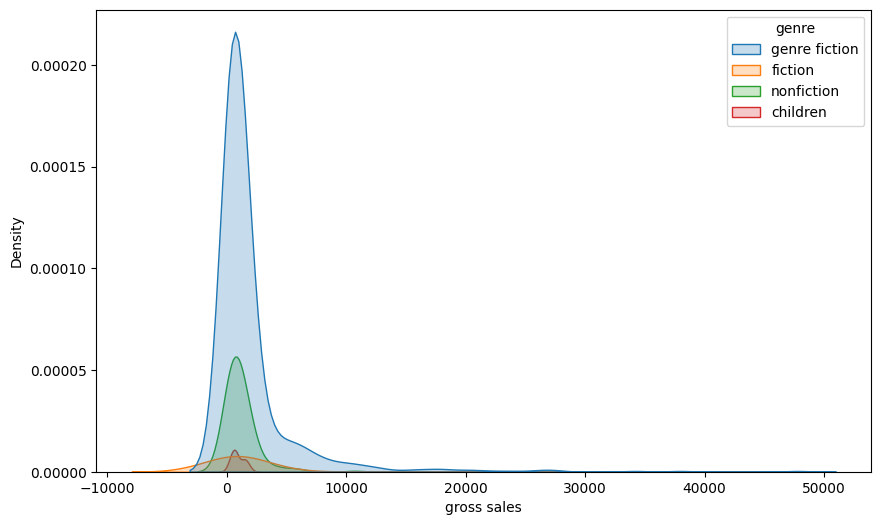

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df, x='gross sales', hue='genre', fill=True)
plt.show()

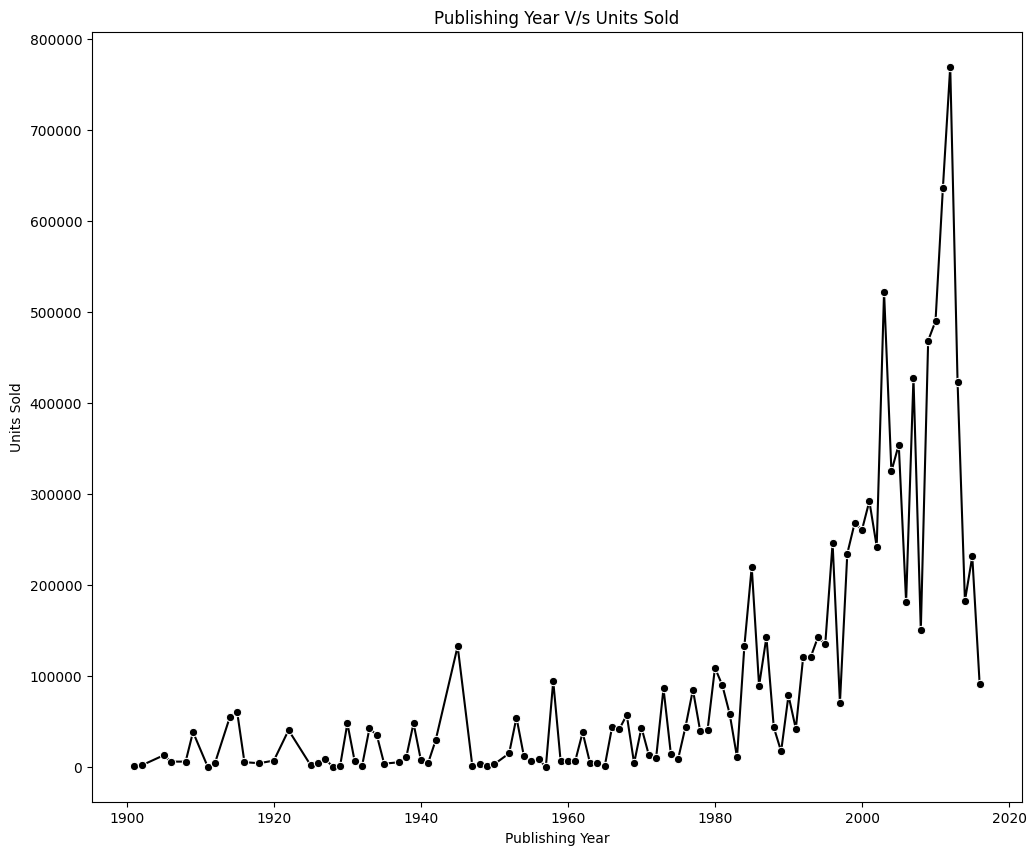

In [22]:
# publishing year and units sold
plt.figure(figsize=(12, 10))
sns.lineplot(df.groupby('Publishing Year')['units sold'].sum(),color='black',marker='o')
plt.xlabel('Publishing Year')
plt.ylabel('Units Sold')
plt.title('Publishing Year V/s Units Sold')
plt.show()

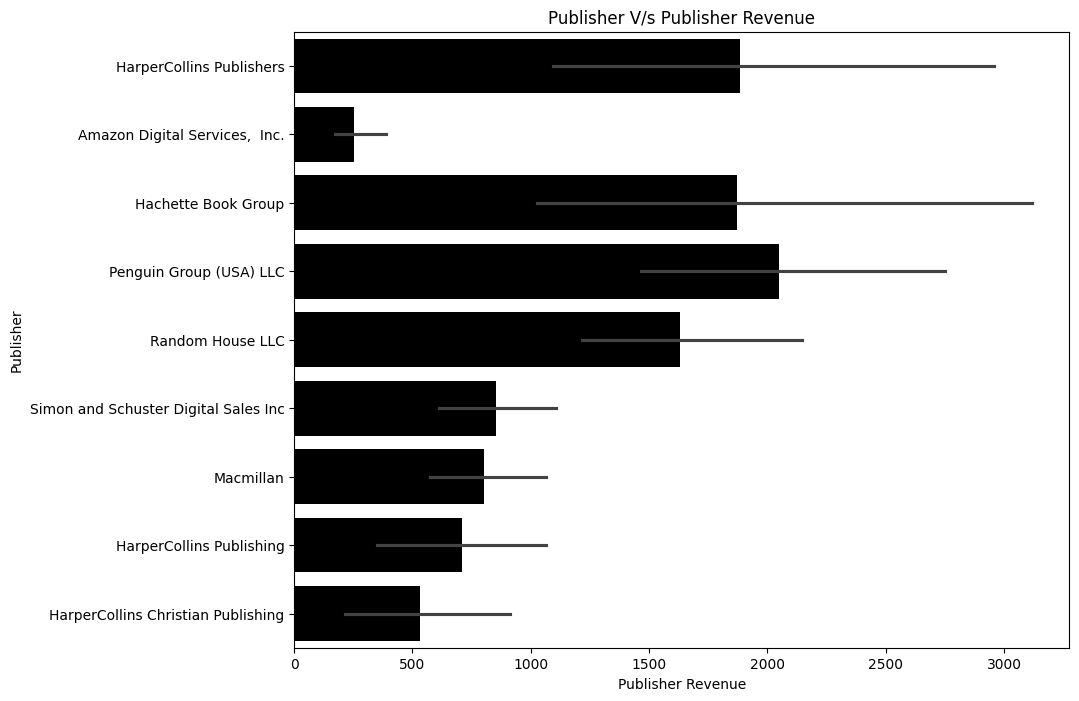

In [23]:
# publisher vs publisher revenue
plt.figure(figsize=(10, 8))
sns.barplot(df, x='publisher revenue', y='Publisher ', color='black')
plt.xlabel('Publisher Revenue')
plt.ylabel('Publisher')
plt.title('Publisher V/s Publisher Revenue')
plt.show()

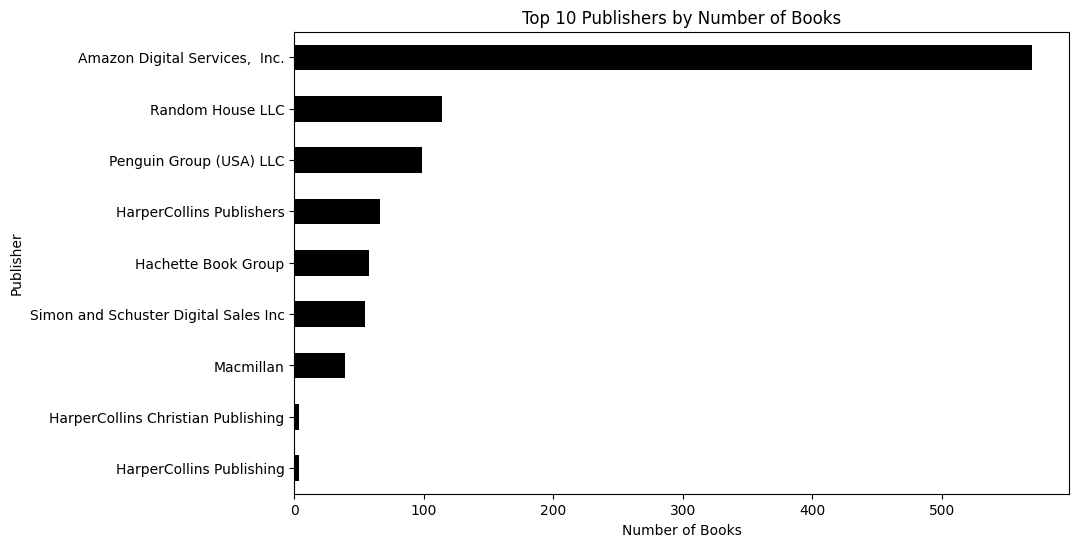

In [24]:
# Calculate and visualize the top 10 publishers
top_publishers = df['Publisher '].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
ax = top_publishers.sort_values().plot(kind='barh', color='black')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.title('Top 10 Publishers by Number of Books')
plt.show()

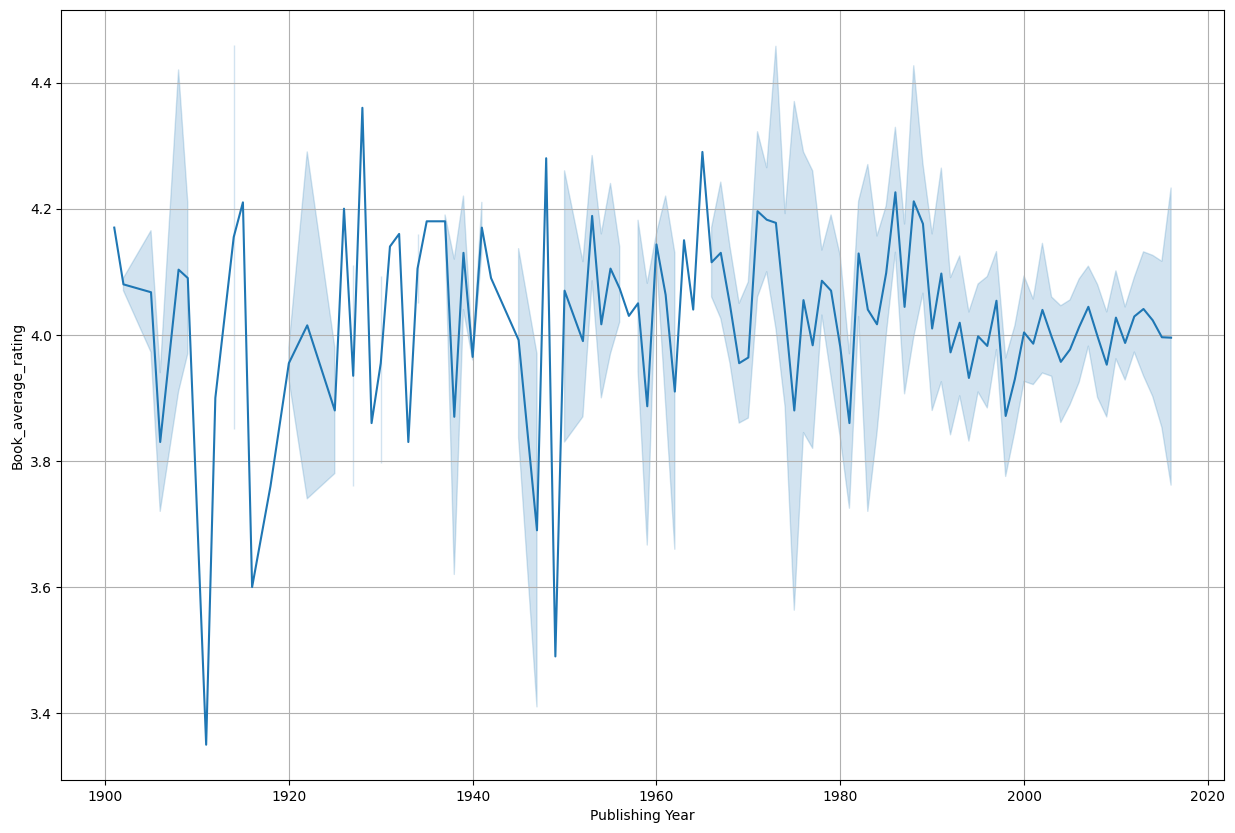

In [25]:
# Avg book ratings for years
plt.figure(figsize=(15, 10))
sns.lineplot(df, x= 'Publishing Year', y='Book_average_rating')
plt.grid(True)
plt.show()

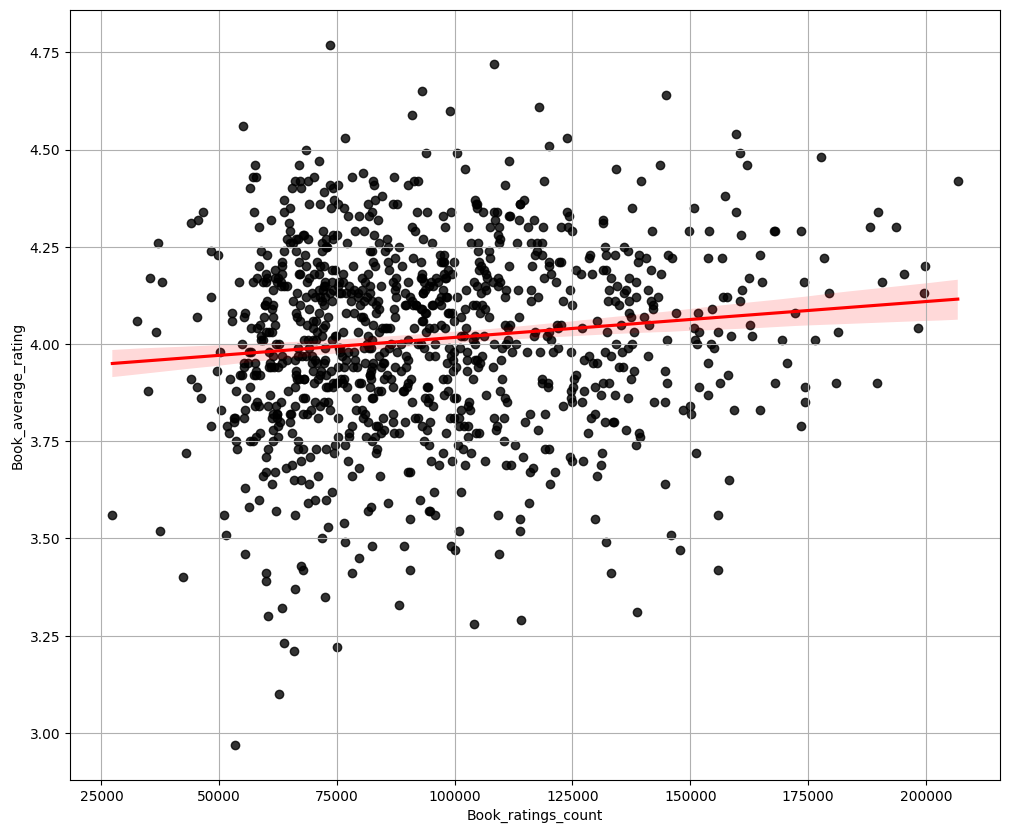

In [26]:
# Is there a correlation between the number of ratings and average rating?
plt.figure(figsize=(12,10))
sns.regplot(df, x= 'Book_ratings_count', y='Book_average_rating', scatter_kws={'color': 'black'}, line_kws={'color': 'red'})
plt.grid(True)
plt.show()

### Multi-Variate Analysis

In [27]:
corr= df.corr(numeric_only=True)
corr

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
index,1.000000,0.066492,-0.028864,-0.838464,-0.448460,-0.349426,0.070325,0.999474,0.223017
Publishing Year,0.066492,1.000000,-0.042265,-0.086694,-0.047360,-0.047237,-0.002737,0.064922,0.027166
Book_average_rating,-0.028864,-0.042265,1.000000,0.117761,-0.036861,-0.045883,-0.007354,-0.028519,-0.019400
Book_ratings_count,-0.838464,-0.086694,0.117761,1.000000,0.493851,0.401406,-0.065940,-0.830619,-0.251761
gross sales,-0.448460,-0.047360,-0.036861,0.493851,1.000000,0.922088,0.272027,-0.435264,-0.147371
publisher revenue,-0.349426,-0.047237,-0.045883,0.401406,0.922088,1.000000,0.310479,-0.339235,-0.113747
sale price,0.070325,-0.002737,-0.007354,-0.065940,0.272027,0.310479,1.000000,0.068377,0.014058
sales rank,0.999474,0.064922,-0.028519,-0.830619,-0.435264,-0.339235,0.068377,1.000000,0.212684
units sold,0.223017,0.027166,-0.019400,-0.251761,-0.147371,-0.113747,0.014058,0.212684,1.000000


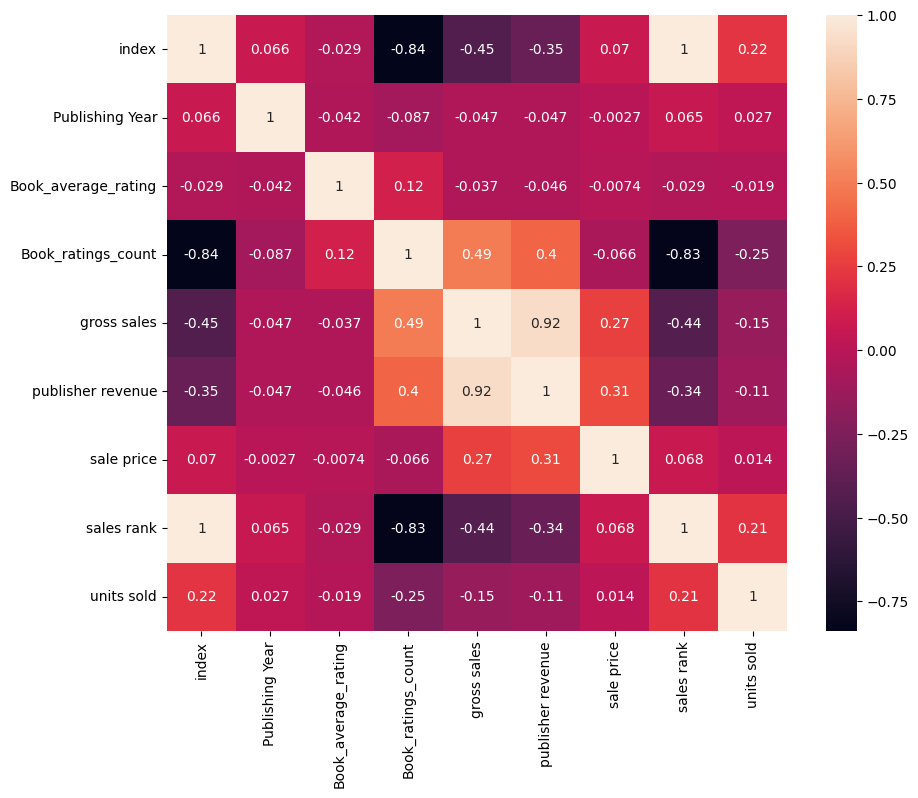

In [28]:
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot=True)
plt.show()

# Here are some Conclusions:

- Publishing Year: There's a peak in book publications around 2010-2012.

- Genre: "genre fiction" is the most common genre in the dataset.

- Book Ratings: The distribution of average book ratings is skewed towards higher ratings, with most books having an average rating between 3.5 and 4.5.

- Top Authors and Books: You've identified the top 10 authors by average rating and the top 10 bestselling books by units sold.

- Sales and Language: There's a clear peak in gross sales for "genre fiction" and "fiction" genres, and "eng" (English) is the most prevalent language code.

- Publishing Year vs. Units Sold: The line plot shows fluctuations in units sold over the years, with a noticeable increase around 2010-2012, aligning with the peak in publications.

- Publishing Year vs. Average Rating: The line plot shows some variation in average ratings over the years, but no strong upward or downward trend is immediately apparent.

- Correlations: The heatmap and scatter plot show a strong negative correlation between index and Book_ratings_count and sales rank. There's also a moderate positive correlation between gross sales and publisher revenue. Interestingly, there isn't a strong correlation between Book_ratings_count and Book_average_rating.

- Publisher Revenue Distribution: The box plot for publisher revenue by publisher shows the spread of revenue for different publishers. Some publishers have a wide range of revenue, while others are more consistent. This plot helps to understand the variability in revenue within each publisher.